# SVM for classification

Load IRIS dataset, check its contents:


In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [7]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)
print("y_test: ", y_test)

X_train:  (120, 4)
X_test:  (30, 4)
y_train:  (120,)
y_test:  (30,)
y_test:  [0 2 1 2 0 0 1 1 1 1 0 1 1 2 2 0 2 1 2 0 2 0 1 1 1 2 2 1 1 1]


Use a Support Vector Machine for classification:


In [18]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9333333333333333

Let's explore more now. 

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [19]:
# Select the first two features
X = iris.data[:, 0:2]

# Remove samples with target=2 
mask = iris.target != 2
X = X[mask]
y = iris.target[mask]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

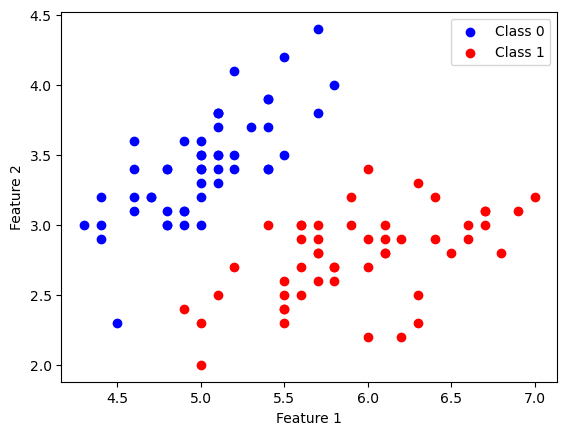

In [22]:
import matplotlib.pyplot as plt 
# Scatter plot
plt.figure()
plt.scatter(X[y==0,0], X[y==0,1], color='blue', label='Class 0')
plt.scatter(X[y==1,0], X[y==1,1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2') 
plt.legend()
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [39]:
# Create and train SVM classifier
from sklearn.svm import SVC
SVMmodel = SVC(C=200, kernel='linear')
SVMmodel.fit(X_train, y_train)

# Test the model
train_score = SVMmodel.score(X_train, y_train)
test_score = SVMmodel.score(X_test, y_test)

print(f"Training accuracy: {train_score}")
print(f"Test accuracy: {test_score}")


Training accuracy: 1.0
Test accuracy: 1.0


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

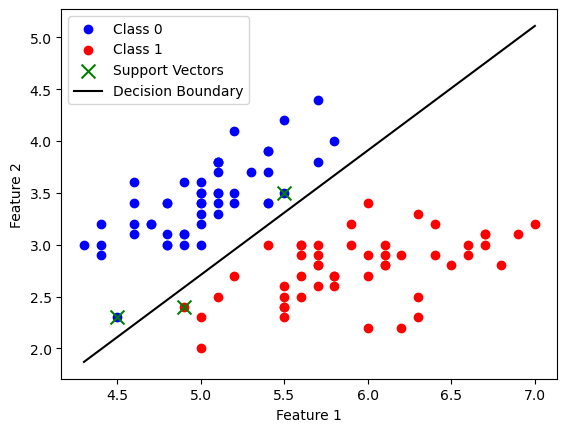

In [45]:
import numpy as np

# Create a single figure for all elements
plt.figure()

# Plot data points first
plt.scatter(X[y==0,0], X[y==0,1], color='blue', label='Class 0')
plt.scatter(X[y==1,0], X[y==1,1], color='red', label='Class 1')

# Plot support vectors
supvectors = SVMmodel.support_vectors_
plt.scatter(supvectors[:,0], supvectors[:,1], color='green', marker='x', 
           s=100, label='Support Vectors')

# Plot decision boundary
W = SVMmodel.coef_
b = SVMmodel.intercept_
x_points = np.array([X[:,0].min(), X[:,0].max()])
y_points = -(W[0][0] * x_points + b[0]) / W[0][1]
plt.plot(x_points, y_points, 'k-', label='Decision Boundary')

# Add labels and show plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

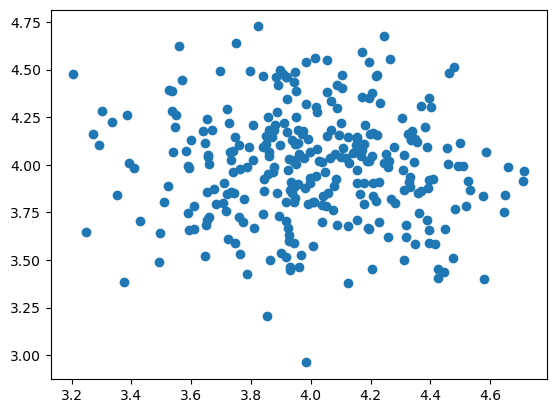

In [41]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

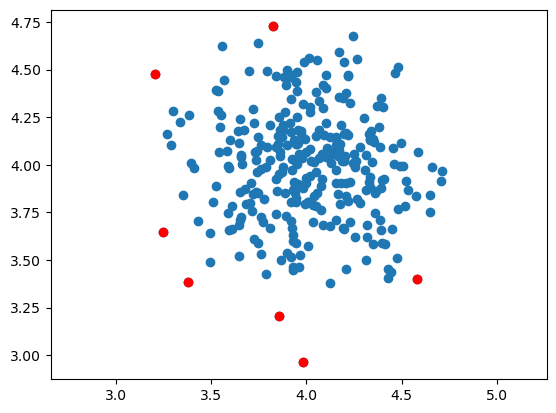

In [46]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

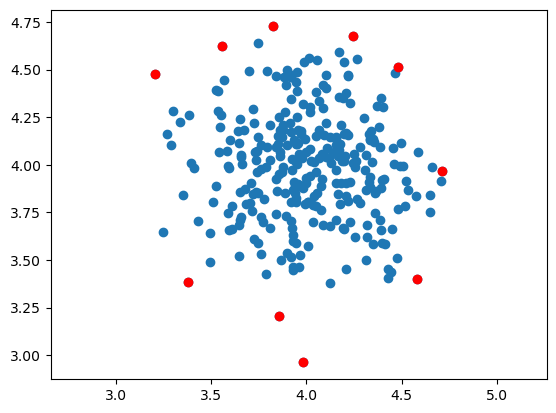

In [47]:
sv = SVMmodelOne.support_vectors_

plt.scatter(x[:,0], x[:,1])
plt.scatter(sv[:,0], sv[:,1], color='red')
plt.axis('equal')
plt.show()


What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.989098620408397


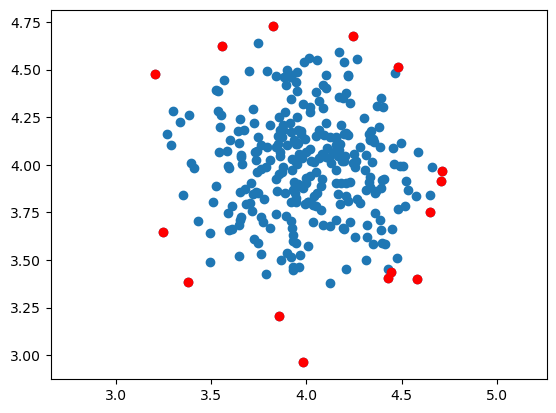

In [51]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.05)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()